<a href="https://colab.research.google.com/github/PepiMartin28/Page-View-Time_visualizer/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import calendar

Import data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PepiMartin28/Page-View-Time_visualizer/main/fcc-forum-pageviews.csv", index_col="date")

df = df.rename(columns={"value": "views"})

df.head()

,views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
df.shape

(1304, 1)

#Clean data

We drop all values that are below 2,5th percentile

In [4]:
df = df.drop(df[df["views"]<=df["views"].quantile(0.025)].index)

In [5]:
df.shape

(1271, 1)

We drop all values that are above 97,5 th percentile

In [6]:
df = df.drop(df[df["views"]>=df["views"].quantile(0.975)].index)

In [7]:
df.shape

(1239, 1)

#Line Plot

Let’s use a line plot to visualize the views through time

First change the type of the index

In [8]:
df.index = pd.to_datetime(df.index)

Now create the line plot and visualize the data

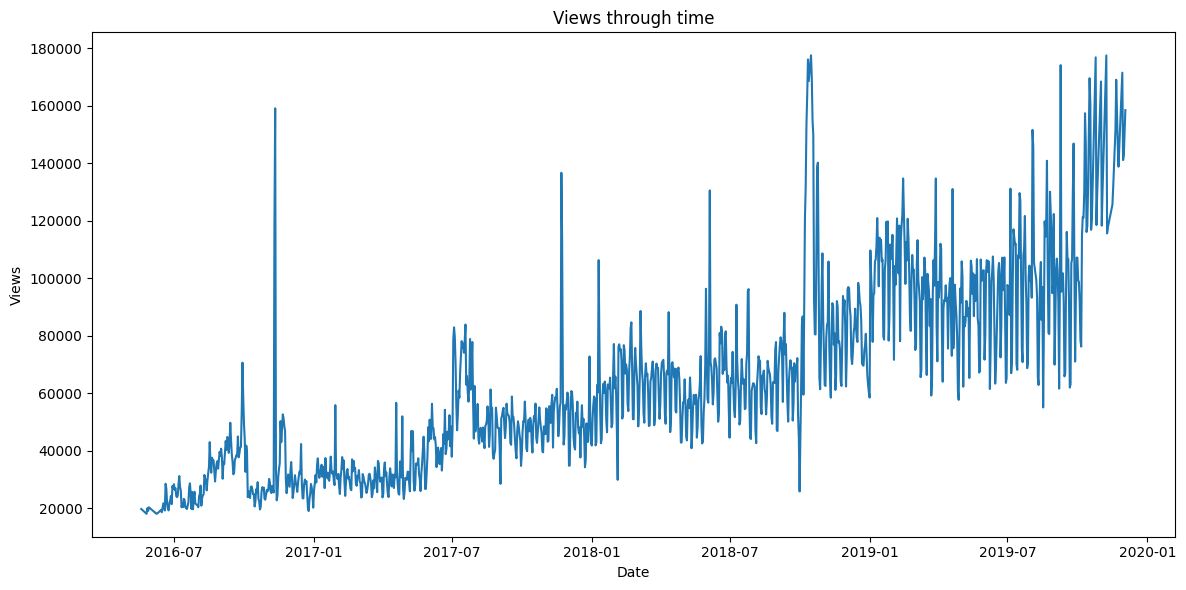

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="views")
plt.title('Views through time')
plt.xlabel('Date')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

#Bar Chart

We are going to create a bar chart to visulize the mean of the views grouped by month and year

First we copy the dataframe

In [36]:
df_barChart = df.copy()

In [37]:
df_barChart.head()

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Then add the "year" and "month" columns

In [38]:
df_barChart["year"] = df_barChart.index.year

In [39]:
df_barChart["month"] = df_barChart.index.month

In [40]:
df_barChart.head()

,views,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


Instead of the number of the month we want the name but we hace to create a categorical column and define the order.

In [42]:
month_order = [calendar.month_name[i] for i in range(1, 13)]

In [43]:
df_barChart['month'] = pd.Categorical(df_barChart['month'].apply(lambda x: calendar.month_name[x]), categories=month_order, ordered=True)

In [44]:
df_barChart.head()

,views,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


Now create the bar chart to visualize the views grouped by month and year

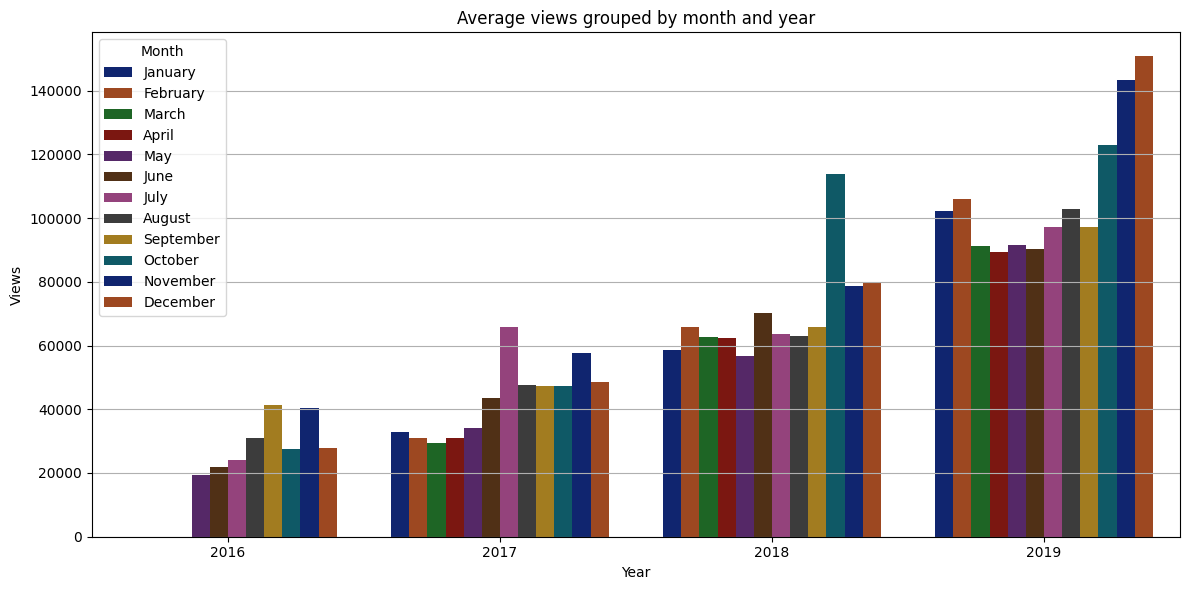

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_barChart, x='year', y='views', hue='month', palette= 'dark', errorbar=None, estimator='mean')
plt.title('Average views grouped by month and year')
plt.xlabel('Year')
plt.ylabel('Views')
plt.legend(title='Month', loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Box Plot

We are going to create a box plot to show how the values are distributed within a given year or month and how it compares over time.

First, copy the dataframe

In [63]:
df_box = df.copy()

Then add the month and year columns

In [64]:
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [66]:
df_box.head()

,date,views,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


Now create a box plot to see the distribution of views for each year

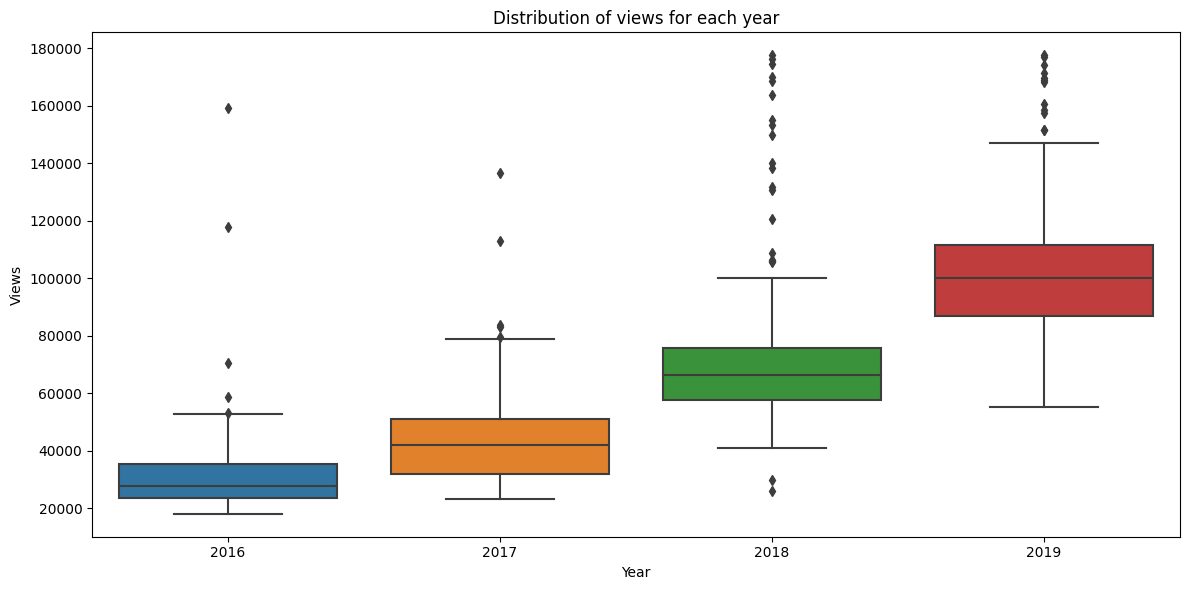

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, x="year", y="views")
plt.title('Distribution of views for each year')
plt.xlabel('Year')
plt.ylabel('Views')
plt.tight_layout()
plt.show()

Before we create the box plot to see the distribution of views for each month, we have to reorder the months

In [79]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_box['month'] = df_box['month'].astype(pd.CategoricalDtype(categories=order, ordered=True))

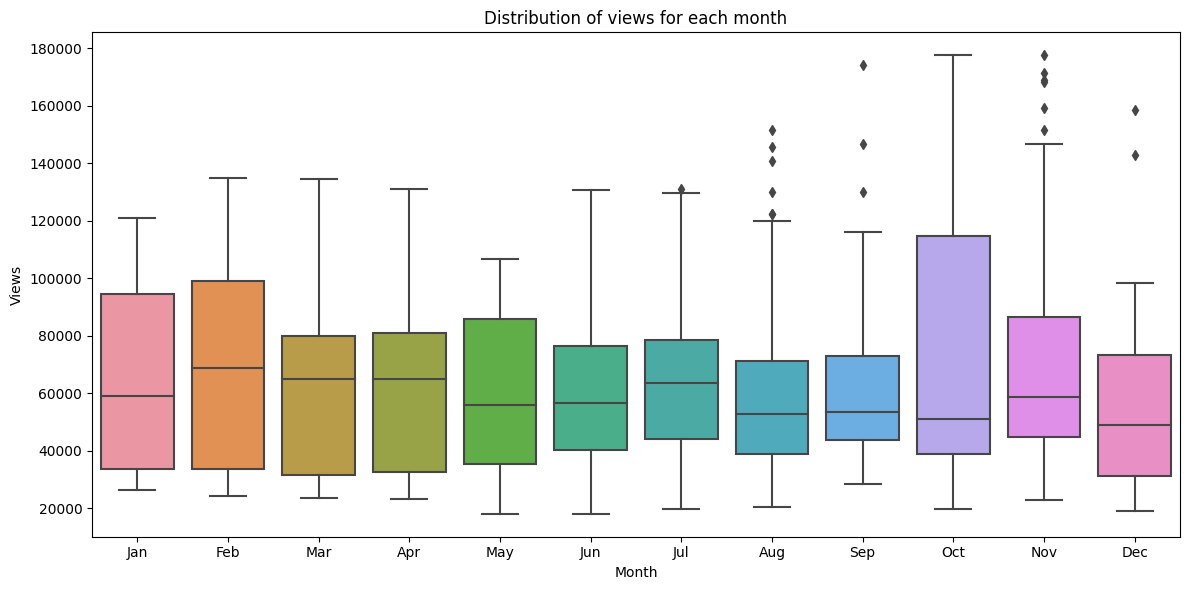

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, x="month", y="views")
plt.title('Distribution of views for each month')
plt.xlabel('Month')
plt.ylabel('Views')
plt.tight_layout()
plt.show()